In [2]:
#安裝套件

# !pip install --upgrade pip setuptools wheel
# !pip install opencv-python opencv_contrib_python
# !pip install matplotlib

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

### Step1. Open CV 顯示圖片
先測試 open cv 是否安裝正確，隨便找一張圖片，和程式檔案放在同一個資料夾當中，記得更改程式碼的檔案路徑：

```python
    img = cv2.imread('./{你的檔案名稱(含副檔名)}')   # 開啟圖片
```

cv2 會開啟一個視窗顯示你的圖片。你可以按鍵盤任意鍵關閉它，直接按叉叉可能會當機。不小心按到的話就重開 VS Code 。
很麻煩的話，我們可以用 matplotlib 讓圖片直接顯示在 notbook 當中。值得注意的是， cv2 使用的顏色通道為(B,G,R)，而不是常見的(R,G,B)，所以要反向過來。

```python
    img_transform=img[:,:,::-1]
    plt.imshow(img_transform)
    plt.show() 
```

In [4]:
img = cv2.imread('./Mona_Lisa.jpg')                   # 開啟圖片

In [5]:
# 用視窗顯示圖片
 
# cv2.imshow('img', img)          # 顯示圖片
# cv2.waitKey(0)                  # 等待按下任意鍵
# cv2.destroyAllWindows()         # 關閉視窗

In [6]:
# 用 matplotlib 顯示圖片
def showImg(img):
    img_transform=img[:,:,::-1]     # BGR tp RGB
    plt.imshow(img_transform)       # 顯示圖片
    plt.show()                      # 顯示圖片

# showImg(img)

### Step2. Open CV 人臉偵測

下載以下兩個檔案，和程式檔案放在同一個資料夾當中，在程式中導入他們

[1. 設定檔](https://github.com/opencv/opencv/blob/master/samples/dnn/face_detector/deploy.prototxt)

[2. 模型檔](https://github.com/sr6033/face-detection-with-OpenCV-and-DNN/blob/master/res10_300x300_ssd_iter_140000.caffemodel)

```python
    prototxt = "./deploy.prototxt"                                      # 設定檔
    pretrained_model = "./res10_300x300_ssd_iter_140000.caffemodel"     # 模型檔
```

類神經網路回傳的訊號都是一個（或一組）機率值，代表這個模型的信心程度，我們設定一個最小信心值，模型所回傳的信心程度要高於這個值，才算是有偵測到人臉。
```python
    min_confidence = 0.5                    # 最小信心值
```

我提供了幾張照片給你，你都可以試看看
```python
    img = cv2.imread('./Mona_Lisa.jpg')     #蒙娜麗莎
    img = cv2.imread('./img_single.jpg')    #一個人的照片
    img = cv2.imread('./img_multi.jpg')     #很多人的照片   
```

In [7]:
prototxt = "./deploy.prototxt"                                      # 設定檔
pretrained_model = "./res10_300x300_ssd_iter_140000.caffemodel"     # 模型檔
min_confidence = 0.5                                                # 最小信心值
img = cv2.imread('./Mona_Lisa.jpg')                                 # 開啟圖片

In [18]:
def faceDetect(img):
    (h, w) = img.shape[:2]  # 取得圖片的寬高

    # 載入模型
    model = cv2.dnn.readNetFromCaffe(prototxt, pretrained_model)

    # 資料前處理：將圖片 blob
    blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)),   # 將圖片強制轉換成 300x300(模型訓練時用就是用這組數字)
        scalefactor=1.0,                                        # 圖片縮放
        size=(300, 300),                                        # 輸出大小(模型訓練時用就是用這組數字)
        mean=(104.0, 177.0, 123.0))                             # 影像去均值(模型訓練時用就是用這組數字)

    # 給模型輸入資料
    model.setInput(blob)
    
    # 執行
    detections = model.forward()

    # 渲染處理結果
    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > min_confidence:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            text = "{:.2f}%".format(confidence * 100)
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.rectangle(img, (startX, startY), (endX, endY),
            (0, 255, 255), 2)
            cv2.putText(img, text, (startX, y),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

# faceDetect(img,img)
# showImg(img)

the shape of blob: (1, 3, 300, 300)
[[[[ -15.  -25.  -29. ...  -48.  -40.  -35.]
   [ -18.  -24.  -27. ...  -37.  -42.  -46.]
   [ -33.  -30.  -24. ...  -39.  -42.  -14.]
   ...
   [ -29.  -50.  -54. ...  -68.  -53.  -28.]
   [ -10.  -58.  -61. ...  -67.  -37.  -17.]
   [   0.  -22.  -45. ...  -30.  -33.  -25.]]

  [[ -69.  -78.  -79. ... -102.  -97. -100.]
   [ -65.  -71.  -73. ...  -83.  -87.  -94.]
   [ -68.  -70.  -68. ...  -76.  -91.  -77.]
   ...
   [-127. -151. -159. ... -169. -149. -116.]
   [-103. -154. -162. ... -169. -129.  -99.]
   [ -88. -114. -143. ... -123. -123. -112.]]

  [[ -22.  -31.  -35. ...  -59.  -48.  -44.]
   [ -25.  -31.  -33. ...  -44.  -48.  -52.]
   [ -31.  -32.  -32. ...  -43.  -50.  -25.]
   ...
   [ -63.  -87.  -96. ... -114.  -91.  -54.]
   [ -41.  -93. -102. ... -113.  -69.  -35.]
   [ -30.  -55.  -84. ...  -68.  -64.  -51.]]]]
the shape of image: (599, 402, 3)
[[[ 91 109 102]
  [ 83 100  96]
  [ 75  95  90]
  ...
  [ 75  94  85]
  [ 92  99 102]
  [ 93

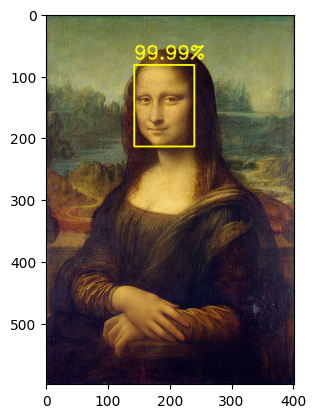

In [19]:
# 蒙娜麗莎

img = cv2.imread('./Mona_Lisa.jpg')     # 開啟圖片
faceDetect(img)                         # 偵測人臉
showImg(img)                            # 顯示圖片

the shape of blob: (1, 3, 300, 300)
[[[[-102.  -91. -100. ...  -93.  -91.  -82.]
   [ -94.  -66.  -90. ...  -99.  -87.  -96.]
   [ -95.  -89.  -96. ...  -81.  -93.  -90.]
   ...
   [ -83.  -89.  -93. ...  -99.  -97.  -99.]
   [ -93.  -87.  -94. ...  -79.  -90.  -94.]
   [ -69.  -87.  -90. ...  -87.  -91.  -91.]]

  [[-156. -146. -157. ... -154. -153. -144.]
   [-152. -123. -147. ... -164. -151. -162.]
   [-156. -148. -153. ... -145. -156. -154.]
   ...
   [-146. -153. -156. ... -161. -158. -158.]
   [-156. -150. -158. ... -141. -148. -150.]
   [-133. -150. -152. ... -148. -153. -149.]]

  [[ -94.  -84.  -97. ...  -87.  -89.  -82.]
   [ -89.  -61.  -86. ...  -97.  -87.  -98.]
   [ -92.  -86.  -92. ...  -81.  -92.  -90.]
   ...
   [ -82.  -89.  -92. ...  -89.  -86.  -86.]
   [ -92.  -86.  -94. ...  -68.  -76.  -78.]
   [ -70.  -88.  -90. ...  -76.  -80.  -76.]]]]
the shape of image: (947, 800, 3)
[[[ 9 28 36]
  [18 37 45]
  [ 5 24 32]
  ...
  [33 43 53]
  [28 39 47]
  [25 36 44]]

 [[ 0 

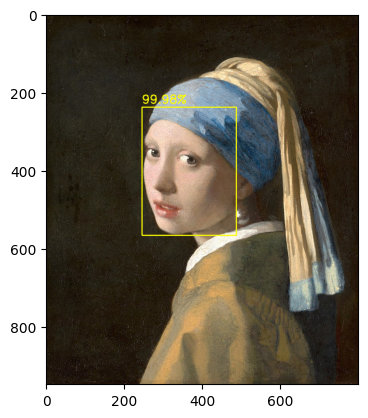

In [13]:
# 一個人的照片

img = cv2.imread('./img_single.jpg')    # 開啟圖片
faceDetect(img)                         # 偵測人臉
showImg(img)                            # 顯示圖片

the shape of blob: (1, 3, 300, 300)
the shape of image: (763, 1024, 3)


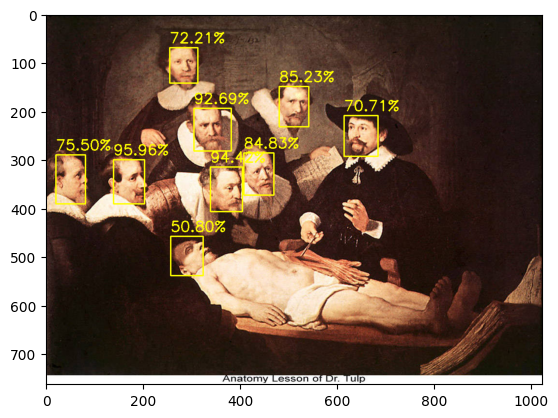

In [11]:
# 很多人的照片

#自己試看看吧！
img=cv2.imread('./img_multi.jpg')
faceDetect(img)
showImg(img)